In [56]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score


## Importing the dataset

In [57]:
data = pd.read_csv('C:/Users/DELL/Desktop/aiml main/diabetes_prediction_dataset.csv')
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Analysis of dataset

In [58]:
## First check null entries
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [59]:
## Now, check for duplicate rows
data.drop_duplicates(inplace=True)
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [60]:
data['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [61]:
## Do Label Encoding for gender column
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,No Info,24.60,4.8,145,0
99996,0,2.0,0,0,No Info,17.37,6.5,100,0
99997,1,66.0,0,0,former,27.83,5.7,155,0
99998,0,24.0,0,0,never,35.42,4.0,100,0


## Now, do analysis for smoking_history

In [62]:
data['smoking_history'].value_counts()

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64

In [63]:
# Convert smoking history to numerical format
smoking_history_mapping = {'never': 0, 'No Info': -1, 'current': 2, 'former': 1, 'ever': 2, 'not current': 0}
data['smoking_history'] = data['smoking_history'].map(smoking_history_mapping)

In [64]:
data.describe()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,0.416065,41.794326,0.077601,0.040803,0.029143,27.321461,5.532609,138.218231,0.088220
std,0.493287,22.462948,0.267544,0.197833,0.993422,6.767716,1.073232,40.909771,0.283616
min,0.000000,0.080000,0.000000,0.000000,-1.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,-1.000000,23.400000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,2.000000,95.690000,9.000000,300.000000,1.000000


## Do analysis for age column

because, above cell shows min value for age is 0.08, that is not possible

<AxesSubplot:>

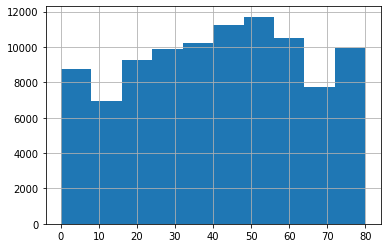

In [65]:
data['age'].hist()

## Task: Remove all records where age is given in decimal

In [66]:
data = data[data['age'].mod(1) == 0]
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,-1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,2,23.45,5.0,155,0
4,1,76.0,1,1,2,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,-1,24.60,4.8,145,0
99996,0,2.0,0,0,-1,17.37,6.5,100,0
99997,1,66.0,0,0,1,27.83,5.7,155,0
99998,0,24.0,0,0,0,35.42,4.0,100,0


In [67]:
## convert age column datatype to int
data['age'] = data['age'].astype(int)
data.head()

c:\Python37\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80,0,1,0,25.19,6.6,140,0
1,0,54,0,0,-1,27.32,6.6,80,0
2,1,28,0,0,0,27.32,5.7,158,0
3,0,36,0,0,2,23.45,5.0,155,0
4,1,76,1,1,2,20.14,4.8,155,0


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94133 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               94133 non-null  int32  
 1   age                  94133 non-null  int32  
 2   hypertension         94133 non-null  int64  
 3   heart_disease        94133 non-null  int64  
 4   smoking_history      94133 non-null  int64  
 5   bmi                  94133 non-null  float64
 6   HbA1c_level          94133 non-null  float64
 7   blood_glucose_level  94133 non-null  int64  
 8   diabetes             94133 non-null  int64  
dtypes: float64(2), int32(2), int64(5)
memory usage: 6.5 MB


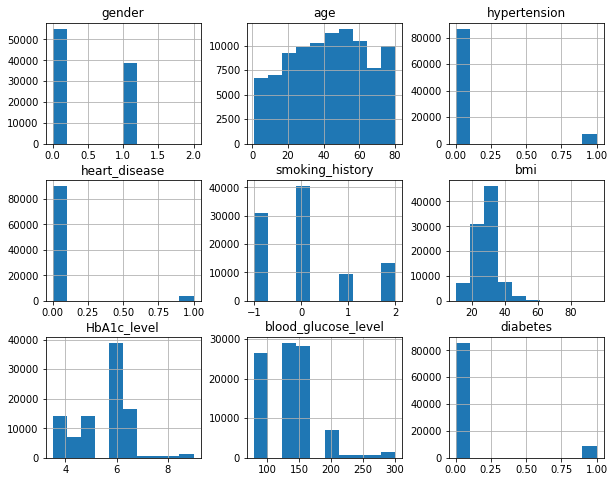

In [69]:
data.hist(bins=10, figsize=(10,8))
plt.show()

## Analysis for diabetes column

In [70]:
data['diabetes'].value_counts()

0    85651
1     8482
Name: diabetes, dtype: int64

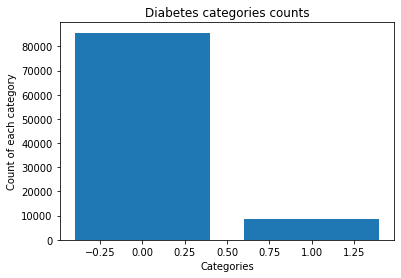

Count_of_0%: 90.9893448631192
Count_of_1%: 9.010655136880796


In [71]:
value_counts = data['diabetes'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Categories')
plt.ylabel('Count of each category')
plt.title('Diabetes categories counts')
plt.show()
print('Count_of_0%: {}'.format(100 *(len(data[data['diabetes'] == 0])/len(data))))
print('Count_of_1%: {}'.format(100 *(len(data[data['diabetes'] == 1])/len(data))))

it means, this data is imbalance.

#### Now, we should apply SMOTE Technique to balance the dependent variable.

## Before, Applying SMOTE

### Spliting the dataset into training and testing

In [72]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

### Now, we will do feature scaling

In [74]:
from sklearn import preprocessing
stand = preprocessing.StandardScaler()
X_train = stand.fit_transform(X_train)
X_test = stand.transform(X_test)

## Training the model using LogisticRegression

In [75]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [76]:
y_pred_lr = lr.predict(X_test)

## Training the model using KNeighborsClassifier

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [78]:
y_pred_knn = knn.predict(X_test)

## Training the model using LinearSVM

In [79]:
%%time
from sklearn.svm import SVC
linear_kernel = SVC(kernel = 'linear')
linear_kernel.fit(X_train, y_train)

Wall time: 26.2 s


SVC(kernel='linear')

In [80]:
y_pred_svm = linear_kernel.predict(X_test)

## Training the model using RBF Kernel

In [81]:
%%time
from sklearn.svm import SVC
ksvm = SVC(kernel = 'rbf')
ksvm.fit(X_train, y_train)

Wall time: 29.3 s


SVC()

In [82]:
y_pred_ksvm = ksvm.predict(X_test)

## Training the model using Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [84]:
y_pred_gnb = gnb.predict(X_test)

## Training the model using Decision Tree Classifier

In [85]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [86]:
y_pred_dtc = dtc.predict(X_test)

## Training the model using Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [88]:
y_pred_rfc = rfc.predict(X_test)

## Training the model using ANN(Artificial Neural Network)

In [89]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [90]:
ann = tf.keras.models.Sequential()

In [91]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) 
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [92]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [93]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
deep_history = ann.fit(X_train, y_train, epochs=100, 
                              validation_data = (X_test, y_test),
                              callbacks=[early_stop])

Epoch 1/100
2354/2354 [==============================] - 2s 700us/step - loss: 0.3389 - accuracy: 0.8666 - val_loss: 0.1222 - val_accuracy: 0.9583
Epoch 2/100
2354/2354 [==============================] - 2s 684us/step - loss: 0.1269 - accuracy: 0.9562 - val_loss: 0.1193 - val_accuracy: 0.9588
Epoch 3/100
2354/2354 [==============================] - 2s 803us/step - loss: 0.1225 - accuracy: 0.9577 - val_loss: 0.1176 - val_accuracy: 0.9583
Epoch 4/100
2354/2354 [==============================] - 2s 658us/step - loss: 0.1193 - accuracy: 0.9578 - val_loss: 0.1175 - val_accuracy: 0.9578
Epoch 5/100
2354/2354 [==============================] - 2s 707us/step - loss: 0.1219 - accuracy: 0.9575 - val_loss: 0.1185 - val_accuracy: 0.9590
Epoch 6/100
2354/2354 [==============================] - 2s 745us/step - loss: 0.1212 - accuracy: 0.9584 - val_loss: 0.1162 - val_accuracy: 0.9580
Epoch 7/100
2354/2354 [==============================] - 2s 650us/step - loss: 0.1226 - accuracy: 0.9579 - val_loss: 0

In [94]:
y_pred_ann = ann.predict(X_test)
y_pred_ann = (y_pred_ann>0.5)

## Apply SMOTE Technique to balance the data

In [95]:
from sklearn.model_selection import train_test_split
(X_sample, y_sample) = train_test_split(data, train_size=0.8, stratify = y)

In [96]:
X_train = X_sample.iloc[:,:-1].values
y_train = X_sample.iloc[:,-1].values
X_test_smote = y_sample.iloc[:,:-1].values
y_test_smote = y_sample.iloc[:,-1].values

In [97]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### Training the dataset using ANN

In [98]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu')) 
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [99]:
ann.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [100]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
deep_history = ann.fit(X_train_smote, y_train_smote, epochs=100,
                              validation_data = (X_test_smote, y_test_smote),
                              callbacks=[early_stop])

Epoch 1/100
4283/4283 [==============================] - 3s 665us/step - loss: 2.0237 - accuracy: 0.6336 - val_loss: 0.5002 - val_accuracy: 0.7638
Epoch 2/100
4283/4283 [==============================] - 3s 599us/step - loss: 0.4383 - accuracy: 0.8046 - val_loss: 0.3099 - val_accuracy: 0.8874
Epoch 3/100
4283/4283 [==============================] - 3s 588us/step - loss: 0.3003 - accuracy: 0.8748 - val_loss: 0.1926 - val_accuracy: 0.9205
Epoch 4/100
4283/4283 [==============================] - 3s 596us/step - loss: 0.2536 - accuracy: 0.8870 - val_loss: 0.3260 - val_accuracy: 0.8410
Epoch 5/100
4283/4283 [==============================] - 3s 598us/step - loss: 0.2510 - accuracy: 0.8869 - val_loss: 0.2661 - val_accuracy: 0.8732
Epoch 6/100
4283/4283 [==============================] - 3s 602us/step - loss: 0.2491 - accuracy: 0.8863 - val_loss: 0.2822 - val_accuracy: 0.8649
Epoch 00006: early stopping


In [101]:
y_pred_ann_smote = ann.predict(X_test_smote)
y_pred_ann_smote = (y_pred_ann_smote>0.5)

### Training model using Kernel SVM

In [102]:
ksvm_smote = SVC(kernel = 'rbf')
ksvm_smote.fit(X_train_smote, y_train_smote)
y_pred_ksvm_smote = ksvm_smote.predict(X_test_smote)

### Training of the model using RandomForestClassifier

In [103]:
rfc_smote = RandomForestClassifier()
rfc_smote.fit(X_train_smote, y_train_smote)
y_pred_rfc_smote = rfc_smote.predict(X_test_smote)

### Training of the model using NaiveBayes

In [104]:
gnb_smote = GaussianNB()
gnb_smote.fit(X_train_smote, y_train_smote)
y_pred_gnb_smote = gnb_smote.predict(X_test_smote)

### Training of the model using LinearSVM

In [105]:
svm_smote = SVC()
svm_smote.fit(X_train_smote, y_train_smote)
y_pred_svm_smote = svm_smote.predict(X_test_smote)

### Training of the model using LogisticRegression

In [106]:
lr_smote = LogisticRegression()
lr_smote.fit(X_train_smote, y_train_smote)
y_pred_lr_smote = lr_smote.predict(X_test_smote)

c:\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Training of the model using DecisionTreeClassifier

In [107]:
dtc_smote = LogisticRegression()
dtc_smote.fit(X_train_smote, y_train_smote)
y_pred_dtc_smote = dtc_smote.predict(X_test_smote)

c:\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Training of the model using KNN

In [108]:
knn_smote = KNeighborsClassifier(n_neighbors = 5)
knn_smote.fit(X_train_smote, y_train_smote)
y_pred_knn_smote = knn_smote.predict(X_test_smote)

## Now, compare Accuracy, F1_score and other params for each classification algorithm before and After SMOTE

In [109]:
print(confusion_matrix(y_test, y_pred_ann).ravel()[3])

1210


In [110]:

df = pd.DataFrame({
    'Before/After SMOTE' : ['Before','Before','Before','Before','Before', 'Before','Before','Before','After','After','After','After','After','After','After','After'],
    'Model Name': ['LR', 'KNN', 'SVM', 'Kernel SVM','Naive Bayes', 'DecisionTree', 'RandomForest', 'ANN', 'LR', 'KNN', 'SVM', 'Kernel SVM','Naive Bayes', 'DecisionTree', 'RandomForest', 'ANN'],
    'True Negative': [confusion_matrix(y_test, y_pred_lr).ravel()[0], confusion_matrix(y_test, y_pred_knn).ravel()[0], confusion_matrix(y_test, y_pred_svm).ravel()[0], confusion_matrix(y_test, y_pred_ksvm).ravel()[0], confusion_matrix(y_test, y_pred_gnb).ravel()[0], confusion_matrix(y_test, y_pred_dtc).ravel()[0], confusion_matrix(y_test, y_pred_rfc).ravel()[0], confusion_matrix(y_test, y_pred_ann).ravel()[0], confusion_matrix(y_test_smote, y_pred_lr_smote).ravel()[0], confusion_matrix(y_test_smote, y_pred_knn_smote).ravel()[0], confusion_matrix(y_test_smote, y_pred_svm_smote).ravel()[0], confusion_matrix(y_test_smote, y_pred_ksvm_smote).ravel()[0], confusion_matrix(y_test_smote, y_pred_gnb_smote).ravel()[0], confusion_matrix(y_test_smote, y_pred_dtc_smote).ravel()[0], confusion_matrix(y_test_smote, y_pred_rfc_smote).ravel()[0], confusion_matrix(y_test_smote, y_pred_ann_smote).ravel()[0]],
    'False Positive': [confusion_matrix(y_test, y_pred_lr).ravel()[1], confusion_matrix(y_test, y_pred_knn).ravel()[1], confusion_matrix(y_test, y_pred_svm).ravel()[1], confusion_matrix(y_test, y_pred_ksvm).ravel()[1], confusion_matrix(y_test, y_pred_gnb).ravel()[1], confusion_matrix(y_test, y_pred_dtc).ravel()[1], confusion_matrix(y_test, y_pred_rfc).ravel()[1], confusion_matrix(y_test, y_pred_ann).ravel()[1], confusion_matrix(y_test_smote, y_pred_lr_smote).ravel()[1], confusion_matrix(y_test_smote, y_pred_knn_smote).ravel()[1], confusion_matrix(y_test_smote, y_pred_svm_smote).ravel()[1], confusion_matrix(y_test_smote, y_pred_ksvm_smote).ravel()[1], confusion_matrix(y_test_smote, y_pred_gnb_smote).ravel()[1], confusion_matrix(y_test_smote, y_pred_dtc_smote).ravel()[1], confusion_matrix(y_test_smote, y_pred_rfc_smote).ravel()[1], confusion_matrix(y_test_smote, y_pred_ann_smote).ravel()[1]],
    'False Negative': [confusion_matrix(y_test, y_pred_lr).ravel()[2], confusion_matrix(y_test, y_pred_knn).ravel()[2], confusion_matrix(y_test, y_pred_svm).ravel()[2], confusion_matrix(y_test, y_pred_ksvm).ravel()[2], confusion_matrix(y_test, y_pred_gnb).ravel()[2], confusion_matrix(y_test, y_pred_dtc).ravel()[2], confusion_matrix(y_test, y_pred_rfc).ravel()[2], confusion_matrix(y_test, y_pred_ann).ravel()[2], confusion_matrix(y_test_smote, y_pred_lr_smote).ravel()[2], confusion_matrix(y_test_smote, y_pred_knn_smote).ravel()[2], confusion_matrix(y_test_smote, y_pred_svm_smote).ravel()[2], confusion_matrix(y_test_smote, y_pred_ksvm_smote).ravel()[2], confusion_matrix(y_test_smote, y_pred_gnb_smote).ravel()[2], confusion_matrix(y_test_smote, y_pred_dtc_smote).ravel()[2], confusion_matrix(y_test_smote, y_pred_rfc_smote).ravel()[2], confusion_matrix(y_test_smote, y_pred_ann_smote).ravel()[2]],
    'True Positive': [confusion_matrix(y_test, y_pred_lr).ravel()[3], confusion_matrix(y_test, y_pred_knn).ravel()[3], confusion_matrix(y_test, y_pred_svm).ravel()[3], confusion_matrix(y_test, y_pred_ksvm).ravel()[3], confusion_matrix(y_test, y_pred_gnb).ravel()[3], confusion_matrix(y_test, y_pred_dtc).ravel()[3], confusion_matrix(y_test, y_pred_rfc).ravel()[3], confusion_matrix(y_test, y_pred_ann).ravel()[3], confusion_matrix(y_test_smote, y_pred_lr_smote).ravel()[3], confusion_matrix(y_test_smote, y_pred_knn_smote).ravel()[3], confusion_matrix(y_test_smote, y_pred_svm_smote).ravel()[3], confusion_matrix(y_test_smote, y_pred_ksvm_smote).ravel()[3], confusion_matrix(y_test_smote, y_pred_gnb_smote).ravel()[3], confusion_matrix(y_test_smote, y_pred_dtc_smote).ravel()[3], confusion_matrix(y_test_smote, y_pred_rfc_smote).ravel()[3], confusion_matrix(y_test_smote, y_pred_ann_smote).ravel()[3]],
    'Accuracy Score': [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_ksvm), accuracy_score(y_test, y_pred_gnb), accuracy_score(y_test, y_pred_dtc), accuracy_score(y_test, y_pred_rfc), accuracy_score(y_test, y_pred_ann), accuracy_score(y_test_smote, y_pred_lr_smote), accuracy_score(y_test_smote, y_pred_knn_smote), accuracy_score(y_test_smote, y_pred_svm_smote), accuracy_score(y_test_smote, y_pred_ksvm_smote), accuracy_score(y_test_smote, y_pred_gnb_smote), accuracy_score(y_test_smote, y_pred_dtc_smote), accuracy_score(y_test_smote, y_pred_rfc_smote), accuracy_score(y_test_smote, y_pred_ann_smote)],
    'F1 Score': [f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_svm), f1_score(y_test, y_pred_ksvm), f1_score(y_test, y_pred_gnb), f1_score(y_test, y_pred_dtc), f1_score(y_test, y_pred_rfc), f1_score(y_test, y_pred_ann), f1_score(y_test_smote, y_pred_lr_smote), f1_score(y_test_smote, y_pred_knn_smote), f1_score(y_test_smote, y_pred_svm_smote), f1_score(y_test_smote, y_pred_ksvm_smote), f1_score(y_test_smote, y_pred_gnb_smote), f1_score(y_test_smote, y_pred_dtc_smote), f1_score(y_test_smote, y_pred_rfc_smote), f1_score(y_test_smote, y_pred_ann_smote)],
})
df

,Before/After SMOTE,Model Name,True Negative,False Positive,False Negative,True Positive,Accuracy Score,F1 Score
0,Before,LR,16931,146,632,1118,0.958676,0.741871
1,Before,KNN,16953,124,639,1111,0.959473,0.744389
2,Before,SVM,17009,68,712,1038,0.958570,0.726891
3,Before,Kernel SVM,17059,18,714,1036,0.961120,0.738944
4,Before,Naive Bayes,15910,1167,585,1165,0.906942,0.570799
5,Before,DecisionTree,16570,507,433,1317,0.950072,0.736989
6,Before,RandomForest,17001,76,531,1219,0.967759,0.800657
7,Before,ANN,17049,28,540,1210,0.969831,0.809906
8,After,LR,15245,1886,212,1484,0.888564,0.585867
9,After,KNN,15497,1634,341,1355,0.895097,0.578442


## Conclusion:
1. Before SMOTE, ANN have highest accuracy but After apply SMOTE, RandomForest has highest accuracy 96.5%
2. Before SMOTE, F1_score for KNN is 0.
3. For RandomForest, Before SMOTE F1_score is: 80% and After SMOTE F1_score is: 78.42%

In [111]:
### Explore the RandomForest
df_rfc = df[df['Model Name'] == 'RandomForest']
df_rfc

,Before/After SMOTE,Model Name,True Negative,False Positive,False Negative,True Positive,Accuracy Score,F1 Score
6,Before,RandomForest,17001,76,531,1219,0.967759,0.800657
14,After,RandomForest,16981,150,488,1208,0.966112,0.791094


False Negative are reduced from 531 to 504(5%)

#### Predict result for a person have details:
gender: male
age: 23.0
hypertension: 0
heart_disease: 0
smoking_history: 0
bmi: 22.9
HbA1c_label: 5.4
blood_glucose_lavel: 108

In [112]:
## First, Apply feature scaling to this data
## Second, Now predict value using our winning model randonforestclassifier
person_X = stand.transform([[1,23.0, 0,0,0,22.9,5.4, 108]])
person_X

array([[ 1.19060055, -0.89850156, -0.29492435, -0.20928467, -0.04945491,
        -0.69051741, -0.1257119 , -0.73998911]])

In [113]:
person_predict = rfc_smote.predict(person_X)
person_predict = (person_predict>0.5)
person_predict

array([False])

it means this person don't have diabetes.

